## Standard Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
%matplotlib inline

## Get & Review Data

In [2]:
df = pd.read_csv('BirdVarietyData_March2021.csv')

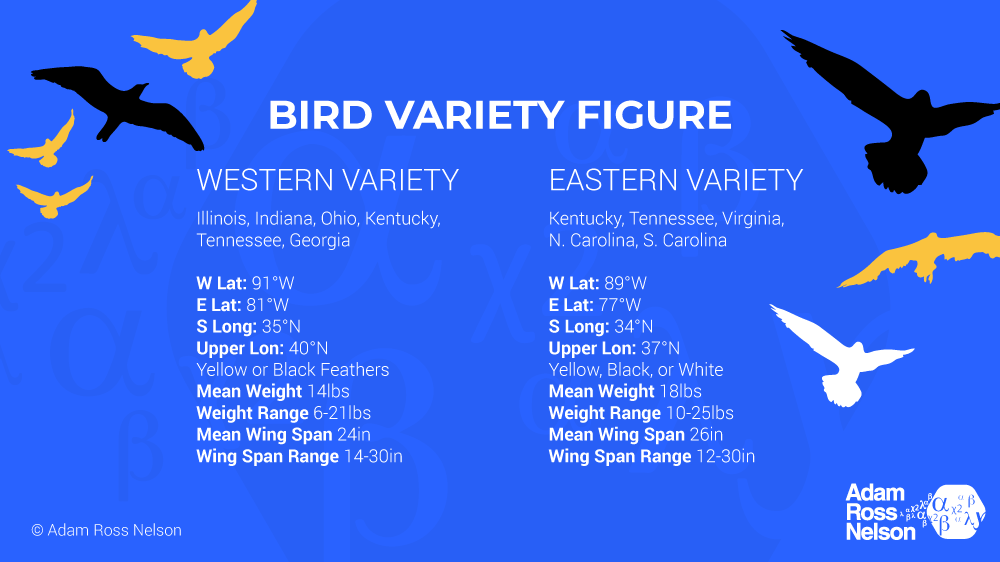

In [4]:
# Display Data Overview
from IPython.display import Image
domain = 'https://raw.githubusercontent.com/adamrossnelson/'
location = 'BirdsDataCreation/main/images/BirdVarietyFigure.png'
Image(domain + location, width=500)

In [3]:
df.head()

,lat,long,weight,wing,color,variety
0,83.921159,40.655318,12.059737,21.162858,Yellow,Western
1,89.532774,35.521465,19.620606,25.443436,Yellow,Western
2,85.376970,41.046102,8.922330,19.067410,Black,Western
3,85.446223,37.257189,14.052334,22.713154,Yellow,Western
4,84.285382,37.730382,19.421060,28.925393,Black,Western


## Encode Categorical Data

In [5]:
df = pd.concat([df, pd.get_dummies(df[['color']], prefix='is')], axis=1)

Alternate encoding option with Python list comprehension.
```Python
# One Hot Encoding with list comprehension.
df['isBlack'] = [1 if x == 'Black' else 0 for x in df['color']]
df['isWhite'] = [1 if x == 'White' else 0 for x in df['color']]
df['isYellow'] = [1 if x == 'Yellow' else 0 for x in df['color']]```

In [6]:
# View the results of One Hot Encoding.
df.head()

,lat,long,weight,wing,color,variety,is_Black,is_White,is_Yellow
0,83.921159,40.655318,12.059737,21.162858,Yellow,Western,0,0,1
1,89.532774,35.521465,19.620606,25.443436,Yellow,Western,0,0,1
2,85.376970,41.046102,8.922330,19.067410,Black,Western,1,0,0
3,85.446223,37.257189,14.052334,22.713154,Yellow,Western,0,0,1
4,84.285382,37.730382,19.421060,28.925393,Black,Western,1,0,0


## Standardize & Scale The Data

In [7]:
# Mean and standard dev for later use in standardizing new observations.
scaler_data = df.drop(['variety','color'], 
                      axis=1).describe().transpose()[['mean','std']]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['variety','color'], axis=1))

scaled_features = scaler.transform(df.drop(['variety','color'], axis=1))

Alternate standardization option. This method will create a new Pandas DataFrame with scaled features:

```Python
scaled_features = df.drop(['variety','color'], axis=1).apply(zscore)
```

In [10]:
scaled_features

array([[-0.21836802,  1.61358081, -0.90621417, ..., -0.8431275 ,
        -0.44935852,  1.18362172],
       [ 1.39301717, -0.96849039,  0.97575013, ..., -0.8431275 ,
        -0.44935852,  1.18362172],
       [ 0.19967049,  1.81012573, -1.68714142, ...,  1.18606023,
        -0.44935852, -0.84486452],
       ...,
       [ 0.54202093,  0.20913125,  0.0948073 , ..., -0.8431275 ,
         2.22539456, -0.84486452],
       [-1.49914184, -0.94946352, -0.13705034, ...,  1.18606023,
        -0.44935852, -0.84486452],
       [-1.6066945 ,  0.34933464,  0.63453668, ...,  1.18606023,
        -0.44935852, -0.84486452]])

## Train, Test, Split The Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, 
                                                    df['variety'], 
                                                    test_size=0.2, 
                                                    random_state=1234)

## Support Vector Machine (SVM) Imports

In [14]:
from sklearn.svm import SVC

In [15]:
model = SVC()

### Fit The Classification Model

In [16]:
model.fit(X_train, y_train)

SVC()

### Make Predictions From The Test Data

In [18]:
pred = model.predict(X_test)

### Review & Evaluate The Results

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
confusion_matrix(pred, y_test)

array([[178,  22],
       [ 24, 176]])

In [21]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

     Eastern       0.88      0.89      0.89       200
     Western       0.89      0.88      0.88       200

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.88       400



## Grid Search For Optimal Parameters

In [23]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 
              'gamma': ['auto',1,0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf']} 

In [38]:
grid = GridSearchCV(SVC(), param_grid,
                    refit=True, verbose=3)

In [39]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.819, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.834, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.847, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.881, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.844, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.847, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.909, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.863, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.800, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.831, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.841, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.894, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.841, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.878, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.909, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.872, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.819, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.825, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.863, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.863, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.894, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.903, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.897, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.872, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.859, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.878, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.0s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['auto', 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [40]:
grid_predictions = grid.predict(X_test)

## Evaluate Grid Search Results

In [41]:
confusion_matrix(grid_predictions, y_test)

array([[173,  20],
       [ 29, 178]])

In [42]:
print(classification_report(grid_predictions, y_test))

              precision    recall  f1-score   support

     Eastern       0.86      0.90      0.88       193
     Western       0.90      0.86      0.88       207

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

